# Environment Test
Run this notebook as an initial test that the docker environment is working as expected.  
The goal is to confirm that earthscopestraintools is installed properly, as well as the fortran program 'hartid' which is used to generate tidal corrections.

If all the cells run, and the last cell makes a plot with sinusoids, then this environment should be working.

In [1]:
#confirm earthscopestraintools is installed and which version
!pip show earthscopestraintools

Name: earthscopestraintools
Version: 0.1.27
Summary: A collection of utilities for working with EarthScope strainmeter data
Home-page: 
Author: 
Author-email: Mike Gottlieb <mike.gottlieb@eartscope.org>
License: Copyright (c) 2023
        
        Permission is hereby granted, free of charge, to any person obtaining a copy
        of this software and associated documentation files (the "Software"), to deal
        in the Software without restriction, including without limitation the rights
        to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
        copies of the Software, and to permit persons to whom the Software is
        furnished to do so, subject to the following conditions:
        
        The above copyright notice and this permission notice shall be included in all
        copies or substantial portions of the Software.
        
        THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
        IMPLIED, INCLUDING BUT NOT 

In [2]:
#confirm the spotl program hartid is installed and available in your path
! which hartid

/opt/spotl/bin/hartid


In [3]:
#confirm baytap08 is installed and available in your path
! which baytap08

/opt/baytap08/bin/baytap08


In [4]:
# import some basic modules from earthscopestraintools and configure logging to appear in the notebook
from earthscopestraintools.mseed_tools import ts_from_mseed
from earthscopestraintools.gtsm_metadata import GtsmMetadata
import logging
logger = logging.getLogger()
logging.basicConfig(
        format="%(message)s", level=logging.INFO
    )

In [5]:
#download some metadata and 10 min strain data
network = 'IV'
station = 'TSM2'
meta = GtsmMetadata(network,station)
start="2023-11-01T00:00:00"
end = "2023-11-08T00:00:00"
strain_raw = ts_from_mseed(network=network, station=station, location='T0', channel='RS*', start=start, end=end)
strain_raw.stats()

IV TSM2 Loading T0 RS* from 2023-11-01T00:00:00 to 2023-11-08T00:00:00 from Earthscope DMC miniseed
    Trace 1. 2023-11-01T00:00:00.000000Z:2023-11-08T00:00:00.000000Z mapping RS1 to CH0
    Trace 2. 2023-11-01T00:00:00.000000Z:2023-11-08T00:00:00.000000Z mapping RS2 to CH1
    Trace 3. 2023-11-01T00:00:00.000000Z:2023-11-08T00:00:00.000000Z mapping RS3 to CH2
    Trace 4. 2023-11-01T00:00:00.000000Z:2023-11-08T00:00:00.000000Z mapping RS4 to CH3
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
  Converting 999999 gap fill values to nan
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
IV.TSM2.T0.RS*
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2023-11-01 00:00:00 - 2023-11-07 23:50:00        | Period:         600.0s
    | Series:         raw| Units:        counts| Level:          0| Gaps:             0.0% 
    | Epochs:        1008| Good: 

In [6]:
#convert raw counts to microstrain
name = f"{network}.{station}.gauge.microstrain"
gauge_microstrain = strain_raw.linearize(reference_strains=meta.reference_strains, gap=meta.gap, name=name)
gauge_microstrain.stats()

Converting raw counts to microstrain
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%
IV.TSM2.gauge.microstrain
    | Channels: ['CH0', 'CH1', 'CH2', 'CH3']             
    | TimeRange: 2023-11-01 00:00:00 - 2023-11-07 23:50:00        | Period:         600.0s
    | Series: microstrain| Units:   microstrain| Level:          1| Gaps:             0.0% 
    | Epochs:        1008| Good:         1008.0| Missing:      0.0| Interpolated:      0.0
    | Samples:       4032| Good:           4032| Missing:        0| Interpolated:        0


Calculating tide correction
    Found 0 epochs with nans, 0.0 epochs with 999999s, and 0 missing epochs.
    Total missing data is 0.0%


/opt/spotl/bin/hartid


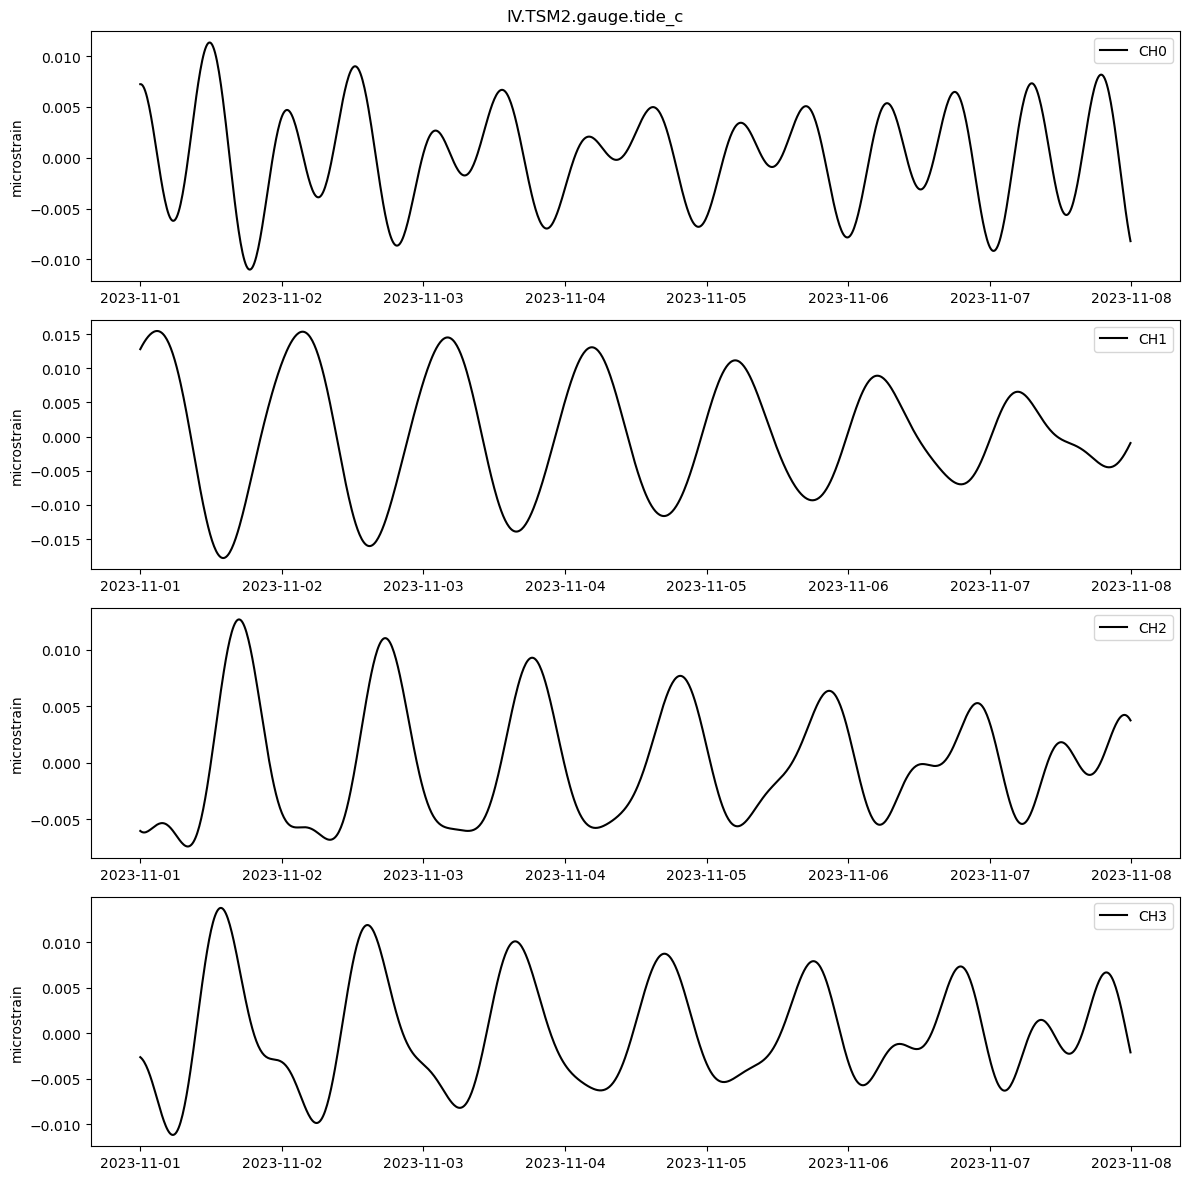

In [7]:
#this cell runs hartid to calculate a tidal correction.  If it works, you should see 4 plots of sinusoids
name = f"{network}.{station}.gauge.tide_c"
tide_c = gauge_microstrain.calculate_tide_correction(tidal_parameters=meta.tidal_params, longitude=meta.longitude, name=name)
tide_c.plot()